In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')    
#Read the data
train_df = pd.read_csv('train.csv', delimiter="\t")
test_df = pd.read_csv('test.csv', delimiter="\t")
test_label_df = pd.read_csv('sample_submission.csv')

In [2]:
#畫圖
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [3]:
new_train_df = train_df['text'].values
new_test_df = test_df['text'].values
# Change the labels
train_df.loc[(train_df['label'] == 'label') , ['label']] = '0'
#train_df['label'] = pd.to_numeric(train_df['label'])
train_label = train_df['label'].values
#test_label_df['label'] = pd.to_numeric(test_label_df['label'])
test_label = test_label_df['label'].values

In [4]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# vectorizer.fit(new_train_df)

# X_train = vectorizer.transform(new_train_df)
# X_test  = vectorizer.transform(new_test_df)
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(new_train_df)

new_X_train = tokenizer.texts_to_sequences(new_train_df)
new_X_test = tokenizer.texts_to_sequences(new_test_df)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(new_train_df[2])
print(new_X_train[2])
#去除停頓詞stop words
#文字探勘前處理，將文字轉換成向量，方法為tf-idf
#Initialize a TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# #Fit and transform train set, transform test set
# tfidf_train = tfidf_vectorizer.fit_transform(new_train_df)
# tfidf_test = tfidf_vectorizer.transform(new_test_df)
# #向量轉成陣列
# tfidf_train_weight = tfidf_train.toarray()  
# tfidf_test_weight = tfidf_test.toarray()
# tfidf_train_weight.shape[1]

It’s safe to say that Instagram Stories has far surpassed its competitor Snapchat in popularity since it’s inception two years ago—and your favorite celebrities have hopped on the social media trend. Unlike a highly curated photo feed, Instagram Stories is where celebrities seem to be comfortable enough to be raw and open.  Need something to do while you’re waiting in line or on a short break? Take a peek at these celebrities’ Instagram Stories for some surprisingly engaging entertainment.  Busy Philipps, @busyphilipps  A fantastic story teller, Busy was dubbed by The New Yorker as “the breakout star of Instagram Stories”. She captures everything from morning workouts to paparazzi run-ins and everything in between. If it isn’t on Busy’s story, I am assuming it didn’t happen.  Mandy Moore, @mandymooremm  Following Mandy Moore for her many This is Us behind-the-scenes stories is worth it alone! She also InstaStoried her home being built and decorated, her Mount Kilimanjaro climb, and the

In [5]:
from keras.preprocessing.sequence import pad_sequences
max_len = 100
new_X_train = pad_sequences(new_X_train, padding='post', maxlen=max_len)
new_X_test = pad_sequences(new_X_test, padding='post', maxlen=max_len)
print(new_X_train[0, :])

[2498  704  184  218    6  414  920    2   20  107  284 1887 2046  265
    4  303  247   78   22   55   11 1203   26 2055  144    1   67 1313
   39  565    1  545 1854  149  276    4   90    5  271  172   20 2833
   11  142  886    1   27 3111   46   15   11  208  920   38    6    7
  322    2   19   11 3578    3 4395  798 1062   60   60 1788   15   58
 1314   11 1068  127 2055  984   43  172    2   15   64   24 1600   74
   91    7   53 2758  312    1  858  395   53  211  599  181 1008 4630
    8  202]


In [6]:
train_label = pd.get_dummies(train_label).values
test_label = pd.get_dummies(test_label).values

In [7]:
print(new_X_train.shape)
print(train_label.shape)
print(new_X_test.shape)
print(test_label.shape)

(4987, 100)
(4987, 2)
(1247, 100)
(1247, 2)


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
input_dim = vocab_size
modelRNN = Sequential()
modelRNN.add(Embedding( output_dim=32,
                        input_dim = vocab_size,  
                        input_length=new_X_train.shape[1]))
#建立16個神經元的RNN層
modelRNN.add(Dropout(0.2)) 
modelRNN.add(SimpleRNN(units=16))
# 建立隱藏層
# 建立256個神經元的隱藏層
# ReLU激活函數
modelRNN.add(Dense(256 ,activation='relu')) 
modelRNN.add(Dropout(0.7))
#建立輸出層
#建立一個神經元的輸出層
#Sigmoid激活函數
modelRNN.add(Dense(units=2,activation='sigmoid'))
modelRNN.summary()
#定義訓練模型
modelRNN.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           2681344   
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 2,686,994
Trainable params: 2,686,994
Non-trainable params: 0
______________________________________________

In [9]:
print(new_X_train.shape, new_X_train.dtype)
print(train_label.shape, train_label.dtype)
print(new_X_test.shape, new_X_test.dtype)
print(test_label.shape, test_label.dtype)

(4987, 100) int32
(4987, 2) uint8
(1247, 100) int32
(1247, 2) uint8


In [10]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.0


(4987, 100) float64
(4987, 2) float64
(1247, 100) float64
(1247, 2) float64
Epoch 1/10
50/50 - 2s - loss: 0.6790 - accuracy: 0.5815 - val_loss: 0.7044 - val_accuracy: 0.5020
Epoch 2/10
50/50 - 2s - loss: 0.6332 - accuracy: 0.6491 - val_loss: 0.7561 - val_accuracy: 0.5116
Epoch 3/10
50/50 - 2s - loss: 0.4756 - accuracy: 0.7937 - val_loss: 0.9357 - val_accuracy: 0.4948
Epoch 4/10
50/50 - 2s - loss: 0.3202 - accuracy: 0.8805 - val_loss: 1.1787 - val_accuracy: 0.5036
Epoch 5/10
50/50 - 2s - loss: 0.2026 - accuracy: 0.9278 - val_loss: 1.3486 - val_accuracy: 0.5156
Epoch 6/10
50/50 - 2s - loss: 0.1372 - accuracy: 0.9529 - val_loss: 1.6304 - val_accuracy: 0.5204
Epoch 7/10
50/50 - 2s - loss: 0.1115 - accuracy: 0.9669 - val_loss: 1.6536 - val_accuracy: 0.5116
Epoch 8/10
50/50 - 2s - loss: 0.0796 - accuracy: 0.9757 - val_loss: 1.8604 - val_accuracy: 0.5116
Epoch 9/10
50/50 - 2s - loss: 0.0732 - accuracy: 0.9785 - val_loss: 2.0193 - val_accuracy: 0.4980
Epoch 10/10
50/50 - 2s - loss: 0.0670 - ac

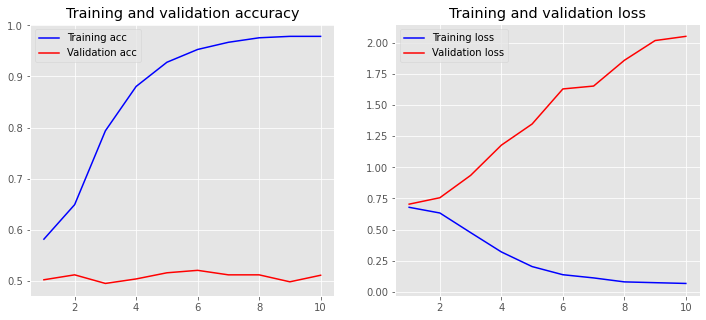

In [11]:
# from keras import backend as K #转换为张量
# X_train1 = K.cast_to_floatx(X_train)
# train_label1 = K.cast_to_floatx(train_label)
# X_test1 = K.cast_to_floatx(X_test)
# test_label1 = K.cast_to_floatx(test_label)
new_X_train = new_X_train.astype('float64')
new_X_test = new_X_test.astype('float64')
train_label = train_label.astype('float64')
test_label = test_label.astype('float64')
print(new_X_train.shape, new_X_train.dtype)
print(train_label.shape, train_label.dtype)
print(new_X_test.shape, new_X_test.dtype)
print(test_label.shape, test_label.dtype)
history = modelRNN.fit(new_X_train, train_label,
                     epochs=10,
                     batch_size=100,
                     validation_data=(new_X_test, test_label),
                     verbose=2)
loss, accuracy = modelRNN.evaluate(new_X_train, train_label, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelRNN.evaluate(new_X_test, test_label, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [12]:
from keras.layers import LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(output_dim=32,
                    input_dim = vocab_size,  
                    input_length=new_X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           2681344   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 2,734,746
Trainable params: 2,734,746
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/5
71/71 [==============================] - 9s 132ms/step - loss: 0.6715 - accuracy: 0.5945 - val_loss: 0.6626 - val_accuracy: 0.6012
Epoch 2/5
71/71 [==============================] - 9s 126ms/step - loss: 0.6392 - accuracy: 0.6506 - val_loss: 0.6556 - val_accuracy: 0.6232
Epoch 3/5
71/71 [==============================] - 9s 120ms/step - loss: 0.5391 - accuracy: 0.7322 - val_loss: 0.6661 - val_accuracy: 0.6854
Epoch 4/5
71/71 [==============================] - 9s 125ms/step - loss: 0.4157 - accuracy: 0.8133 - val_loss: 0.8317 - val_accuracy: 0.6814
Epoch 5/5
71/71 [==============================] - 9s 121ms/step - loss: 0.3363 - accuracy: 0.8563 - val_loss: 0.7430 - val_accuracy: 0.6814


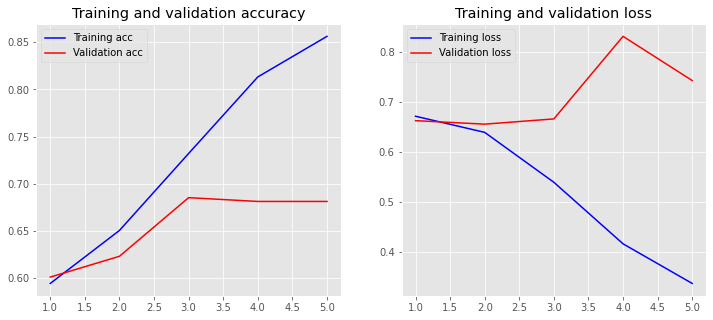

In [13]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64

history = model.fit(new_X_train, train_label, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
plot_history(history)